This project has been made with strong reference to Tariq Rashid and his book on creating ANNs (Make your Own Neural Network. 2016.) 

In [2]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import random

In [6]:
# neural network class definition
class neuralNetwork:
    
# initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
# train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
    
# query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [ ]:
performance_array =[]

In [245]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.05

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

training_data_list2 = training_data_list

In [247]:
# train the neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
index = 0

for epochs in [2,3,4,5,6,7]:
    for e in range(epochs):
        # go through all records in the training data set 
        #print("hidden to output weight 0,0=", n.who[4][5])
        #print("input to hidden weight 0,0=", n.wih[4][5])
        for record in training_data_list:
            # split the record by the ',' commas
            
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass
        pass
        random.shuffle(training_data_list)  
        print("LMAOOO")            #<------- to change between post-epoch randomisation 
        

    #print("hidden to output weight 0,0=", n.who[4][5])
    #print("input to hidden weight 0,0=", n.wih[4][5])

    # test the neural network

    scorecard = []
    out_array = numpy.zeros((10,10))
    count_array = numpy.zeros(10)




    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n.query(inputs)
        
        
        # Note that this array, outputs, is the 10 output nodes of the NW for each trial
        # This is wehre you need to chnage the code below to build the confusion matrix
        

        label = numpy.argmax(outputs)
        # append correct or incorrect to list 
        if (label == correct_label):
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
            #add outputs to array

        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass

        # sum all of the outputs for each image
        for i in range(10):
            out_array[correct_label][i] += outputs[i]
        count_array[correct_label] += 1

    # take the average of the outputs
    for i in range(10):
        out_array[i] = out_array[i]/count_array[i]

    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    performance =  scorecard_array.sum() * 100 / scorecard_array.size
    print("epoch = ", epochs, "performance = ", performance)
    performance_array[index] += performance

    index += 1
    
    #ensure that a new instance is created each time so that learning doesn't carry over into next trial
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)


LMAOOO
LMAOOO
epoch =  2 performance =  96.53
LMAOOO
LMAOOO
LMAOOO
epoch =  3 performance =  96.97
LMAOOO
LMAOOO


KeyboardInterrupt: 

[96.39333333333333, 96.88333333333333, 97.29333333333334, 97.33333333333333, 97.54333333333334, 97.56333333333335]


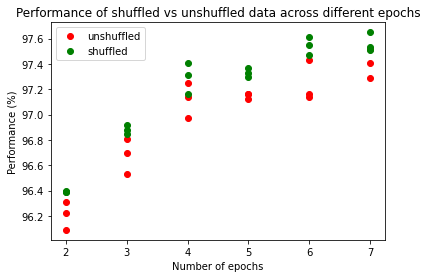

In [223]:

#Below is the data that was recorded for STAGE 1 

epochs = [2,3,4,5,6,7]
no_shuffle1 = [96.31, 96.81, 96.97, 97.16, 97.16, 97.41]
no_shuffle2 = [96.22, 96.7, 97.14, 97.12, 97.14, 97.29]
no_shuffle3 = [96.09, 96.53, 97.25, 97.16, 97.43, 97.52]

shuffle1 = [96.39, 96.88, 97.16, 97.33, 97.55, 97.53]
shuffle2 = [96.40, 96.92, 97.41, 97.37, 97.47, 97.51]
shuffle3 = [96.39, 96.85, 97.31, 97.3, 97.61, 97.65]

#this code generates the averages of the above data

no_shuffle_avg = []
for i in range(0, len(no_shuffle1)):
    no_shuffle_avg.append((no_shuffle1[i]+no_shuffle2[i]+no_shuffle3[i])/3)

shuffle_avg = []
for i in range(0, len(shuffle1)):
    shuffle_avg.append((shuffle1[i]+shuffle2[i]+shuffle3[i])/3)

#this code plots a graph of the above data

plt.plot(epochs, no_shuffle1, 'ro', epochs, no_shuffle2, 'ro')
plt.plot(epochs, no_shuffle3, 'ro', label = "unshuffled")
plt.plot(epochs, shuffle1, 'go', epochs, shuffle2, 'go')
plt.plot(epochs, shuffle3, 'go', label = "shuffled")
plt.xlabel("Number of epochs")
plt.ylabel("Performance (%)")
plt.title("Performance of shuffled vs unshuffled data across different epochs")
plt.legend()


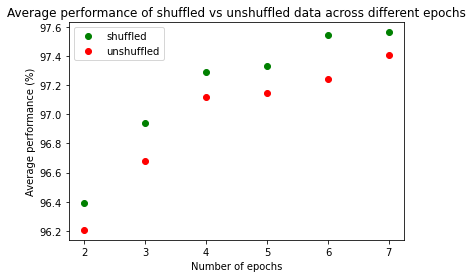

In [222]:

#this code graphs the averages used in stage 1

plt.plot(epochs, shuffle_avg, 'go', label = "shuffled")
plt.plot(epochs, no_shuffle_avg, 'ro', label = "unshuffled")
plt.xlabel("Number of epochs")
plt.ylabel("Average performance (%)")
plt.title("Average performance of shuffled vs unshuffled data across different epochs")
plt.legend()

In [163]:
shuffled_list =[]
no_shuffle_list =[]

In [250]:
#This is the code that was used to generate data in STAGE 2, it is very similar to STAGE1 code, but a for loop was used to
#repeat each trial seven times. outputs were printed for each trial and then copied and pasted into the cell beneath

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
index = 0

output_list = []
epochs = 2                              #<----- this was changed from 2 to 3 to collect data for 2 or 3 epochs
for index in range(0,7):
    for e in range(epochs):
        # go through all records in the training data set 
        for record in training_data_list:
            # split the record by the ',' commas
            
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass
        pass
        random.shuffle(training_data_list)          #<------ once again used to toggle post-epoch shuffling


    # test the neural network
    scorecard = []
    out_array = numpy.zeros((10,10))
    count_array = numpy.zeros(10)


    #random.shuffle(training_data_list)             #<------- this was a part of the code used to produce the data showed in...
    # go through all the records in the test data set           #...table 4. this code was modified to produce the data (i.e....
    for record in test_data_list:                               #...swapping test_data_list with training_data_list)
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n.query(inputs)
        
        # Note that this array, outputs, is the 10 output nodes of the NW for each trial
        # This is wehre you need to chnage the code below to build the confusion matrix

        label = numpy.argmax(outputs)
        # append correct or incorrect to list 
        if (label == correct_label):
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
            #add outputs to array

        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass

        # sum all of the outputs for each image
        for i in range(10):
            out_array[correct_label][i] += outputs[i]
        count_array[correct_label] += 1

    # take the average of the outputs
    for i in range(10):
        out_array[i] = out_array[i]/count_array[i]

    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    performance =  scorecard_array.sum() * 100 / scorecard_array.size
    print("epoch = ", epochs, "performance = ", performance)
    output_list.append(performance)


    index += 1

    #ensure that a new instance is created each time so that learning doesn't carry over into next trial
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)         

epoch =  2 performance =  96.54


KeyboardInterrupt: 

In [243]:
#prints out the results so it can be pasted into cell below
print(output_list)

[95.62, 96.17]


96.91714285714286
97.03


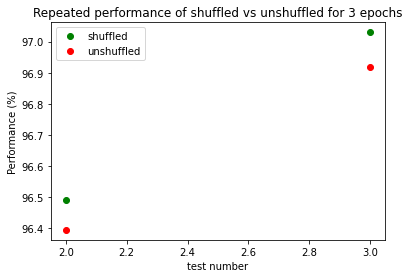

In [219]:
#code used to graph the results from stage 2
#_2 = two epochs, _3 = 3 epochs

no_shuffle_2 = [96.33, 96.35, 96.33, 96.5, 96.36, 96.43, 96.46]
shuffle_2 = [96.58, 96.44, 96.39, 96.44, 96.38, 96.62, 96.58]

no_shuffle_avg2 = sum(no_shuffle_2)/7
shuffle_avg2 = sum(shuffle_2)/7

no_shuffle_3 = [96.94, 97.0, 97.03, 96.94, 96.87, 96.65, 96.99]
shuffle_3 = [97.07, 97.06, 97.07, 96.99, 96.83, 97.22, 96.97]

no_shuffle_avg3 = sum(no_shuffle_3)/7
shuffle_avg3 = sum(shuffle_3)/7

print(no_shuffle_avg3)
print(shuffle_avg3)

shuffled_list = []
shuffled_list.append(shuffle_avg2)
shuffled_list.append(shuffle_avg3)

no_shuffle_list = []
no_shuffle_list.append(no_shuffle_avg2)
no_shuffle_list.append(no_shuffle_avg3)


list = [2, 3]

#graph was not used in the report

plt.plot(list, shuffled_list, 'go', label = "shuffled")
plt.plot(list, no_shuffle_list, 'ro', label = "unshuffled")

plt.xlabel("test number")
plt.ylabel("Performance (%)")
plt.title("Repeated performance of shuffled vs unshuffled for 3 epochs")
plt.legend()


In [240]:
#this is the data that was generated for table 4 in the discussion
#e2 = 2 epochs, NS = no shuffle

e2_training_same_orderNS = [97.05166666666666, 97.01, 97.01833333333333, 97.03166666666667, 96.92333333333333, 96.89166666666667, 96.91833333333334]
e2_training_diff_orderNS = [96.965, 96.74, 96.68, 96.93666666666667, 96.84166666666667, 96.82, 96.965]

e2_training_same_orderS = [96.89666666666666, 96.97166666666666, 96.89833333333333, 96.845, 96.92, 96.75166666666667, 96.86166666666666]
e2_training_diff_orderS = [96.82333333333334, 96.75, 96.94833333333334, 96.915, 97.03166666666667, 96.93833333333333, 96.925]

print(sum(e2_training_same_orderS)/7)

96.87785714285714


Below is the code used to analyse the binary classification ANN

In [251]:
#extract the elements to be classified out of the MNIST dataset, preserving order

binary_training_list = []

for e in training_data_list:
    if (e[0] == "4" or e[0] == "7"):
        binary_training_list.append(e)
    pass

binary_test_list = []

for e in test_data_list:
    if (e[0] == "4" or e[0] == "7"):
        binary_test_list.append(e)
    pass


In [252]:

#modified neural network that has only two output nodes

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

index = 0

two_distinct = [4, 7]

output_list = []
epochs = 3                              #<----- change the number of epochs here
for index in range(0,7):                #<----- seven repeated trials 
    for e in range(epochs):
        
        # go through all records in the training data set 
        for record in binary_training_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            if (int(all_values[0]) == two_distinct[0]):                               
                targets[0] = 0.99
            else:
                targets[1] = 0.99
            n.train(inputs, targets)
            pass
        pass
        random.shuffle(binary_training_list)
       
    # test the neural network

    scorecard = []
    out_array = numpy.zeros((2,2))
    count_array = numpy.zeros(2)


    # go through all the records in the test data set
    for record in binary_test_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n.query(inputs)
        
        
        
        # Note that this array, outputs, is the 10 output nodes of the NW for each trial
        # This is wehre you need to chnage the code below to build the confusion matrix
        
        if (correct_label) == two_distinct[0]:                                        
            correct_label = 0
        else:
           correct_label = 1

        label = numpy.argmax(outputs)
        #print ("label", label, "correct label = ", correct_label)
        # append correct or incorrect to list 
        if (label == correct_label):
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
            #add outputs to array

        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass

        

        # sum all of the outputs for each image
        for i in range(2):    
            out_array[correct_label][i] += outputs[i]
        count_array[correct_label] += 1

    # take the average of the outputs
    for i in range(2):
        out_array[i] = out_array[i]/count_array[i]


    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    performance = scorecard_array.sum() * 100 / scorecard_array.size
    print("epoch = ", epochs, "performance = ", performance)

    output_list.append(performance)
    index += 1
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

epoch =  3 performance =  99.1044776119403
epoch =  3 performance =  99.20398009950249
epoch =  3 performance =  99.20398009950249
epoch =  3 performance =  98.60696517412936


KeyboardInterrupt: 

In [ ]:
print(output_list)

In [ ]:
#store whatever is printed here

no_shuffle_3e_48 = [98.97750511247443, 98.97750511247443, 98.92638036809817, 98.97750511247443, 98.97750511247443, 98.97750511247443, 98.97750511247443]
shuffle_3e_48 = [99.23312883435582, 99.43762781186093, 99.48875255623722, 99.33537832310839, 99.43762781186093, 99.43762781186093, 99.38650306748467]

no_shuffle_3e_56 = [97.78378378378379, 97.83783783783784, 97.78378378378379, 97.89189189189189, 97.94594594594595, 97.94594594594595, 97.89189189189189]
shuffle_3e_56 = [98.32432432432432, 98.43243243243244, 98.54054054054055, 97.78378378378379, 98.27027027027027, 98.05405405405405, 98.21621621621621]

no_shuffle_3e_39 = [98.76176324913324, 98.81129271916791, 98.81129271916791, 98.81129271916791, 98.76176324913324, 98.86082218920258, 98.86082218920258]
shuffle_3e_39 = [98.61317483902923, 98.81129271916791, 98.81129271916791, 98.6627043090639, 98.81129271916791, 98.71223377909857, 98.61317483902923]

no_shuffle_3e_47 = [98.90547263681592, 99.25373134328358, 99.1542288557214,99.0049751243781, 99.25373134328358, 99.20398009950249, 99.30348258706468]
shuffle_3e_47 = [99.35323383084577, 99.30348258706468, 99.20398009950249, 99.25373134328358, 99.1044776119403, 99.1542288557214, 99.1542288557214]

avg_no_shuffle_3e_48 = sum(no_shuffle_3e_48)/7
avg_shuffle_3e_48 = sum(shuffle_3e_48)/7

avg_no_shuffle_3e_56 = sum(no_shuffle_3e_56)/7
avg_shuffle_3e_56 = sum(shuffle_3e_56)/7

avg_no_shuffle_3e_39 = sum(no_shuffle_3e_39)/7
avg_shuffle_3e_39 = sum(shuffle_3e_39)/7

avg_no_shuffle_3e_47 = sum(no_shuffle_3e_47)/7
avg_shuffle_3e_47 = sum(shuffle_3e_47)/7

print(avg_no_shuffle_3e_47)
